### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [345]:
import pandas as pd

processed_data = pd.read_csv('Data/processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [346]:
initial_data = pd.read_csv('Data/taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [347]:
initial_data.shape[0] == processed_data.shape[0]

True

In [348]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [349]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [350]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [351]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

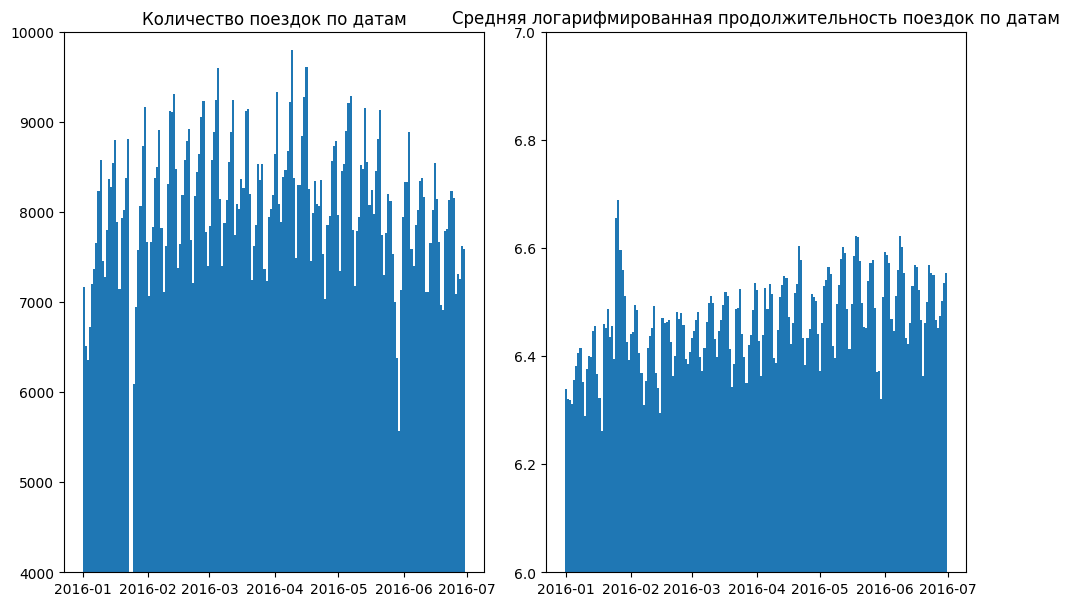

In [352]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(10, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())),
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title='Количество поездок по датам')
ax_2.set(title='Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


<Axes: xlabel='date', ylabel='Count'>

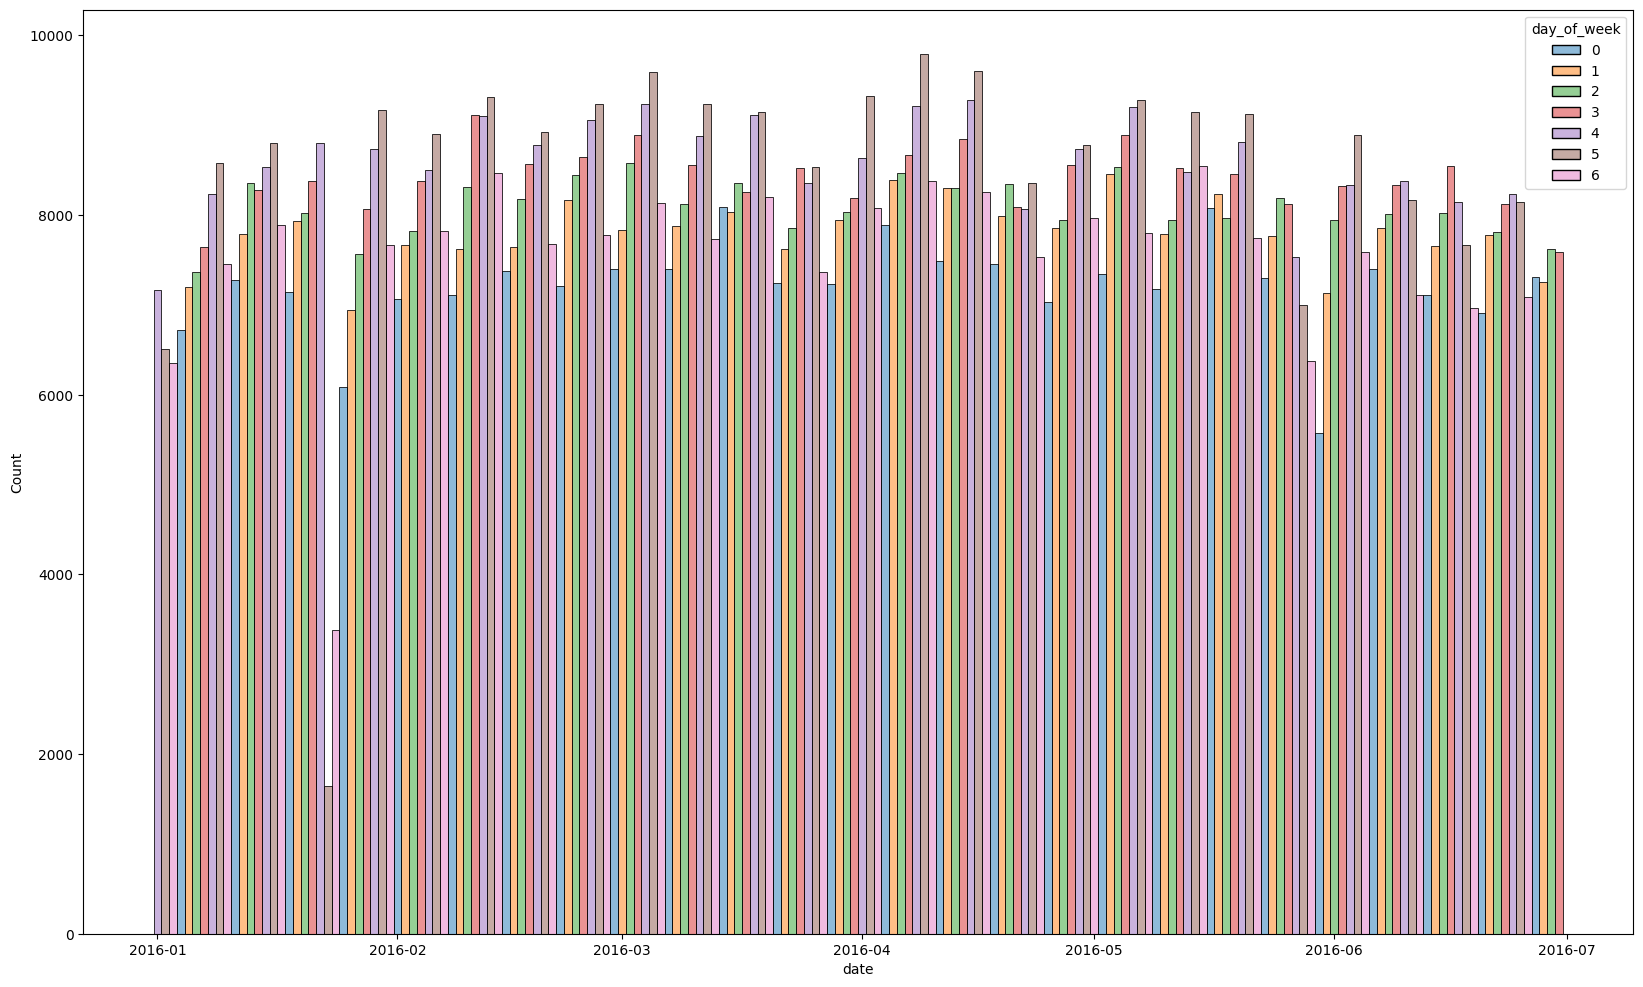

In [353]:
### Your code is here

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.histplot(data=processed_data, x='date', stat='count', hue='day_of_week', palette='tab10', binwidth=5)

<Axes: xlabel='day_of_week', ylabel='log_trip_duration'>

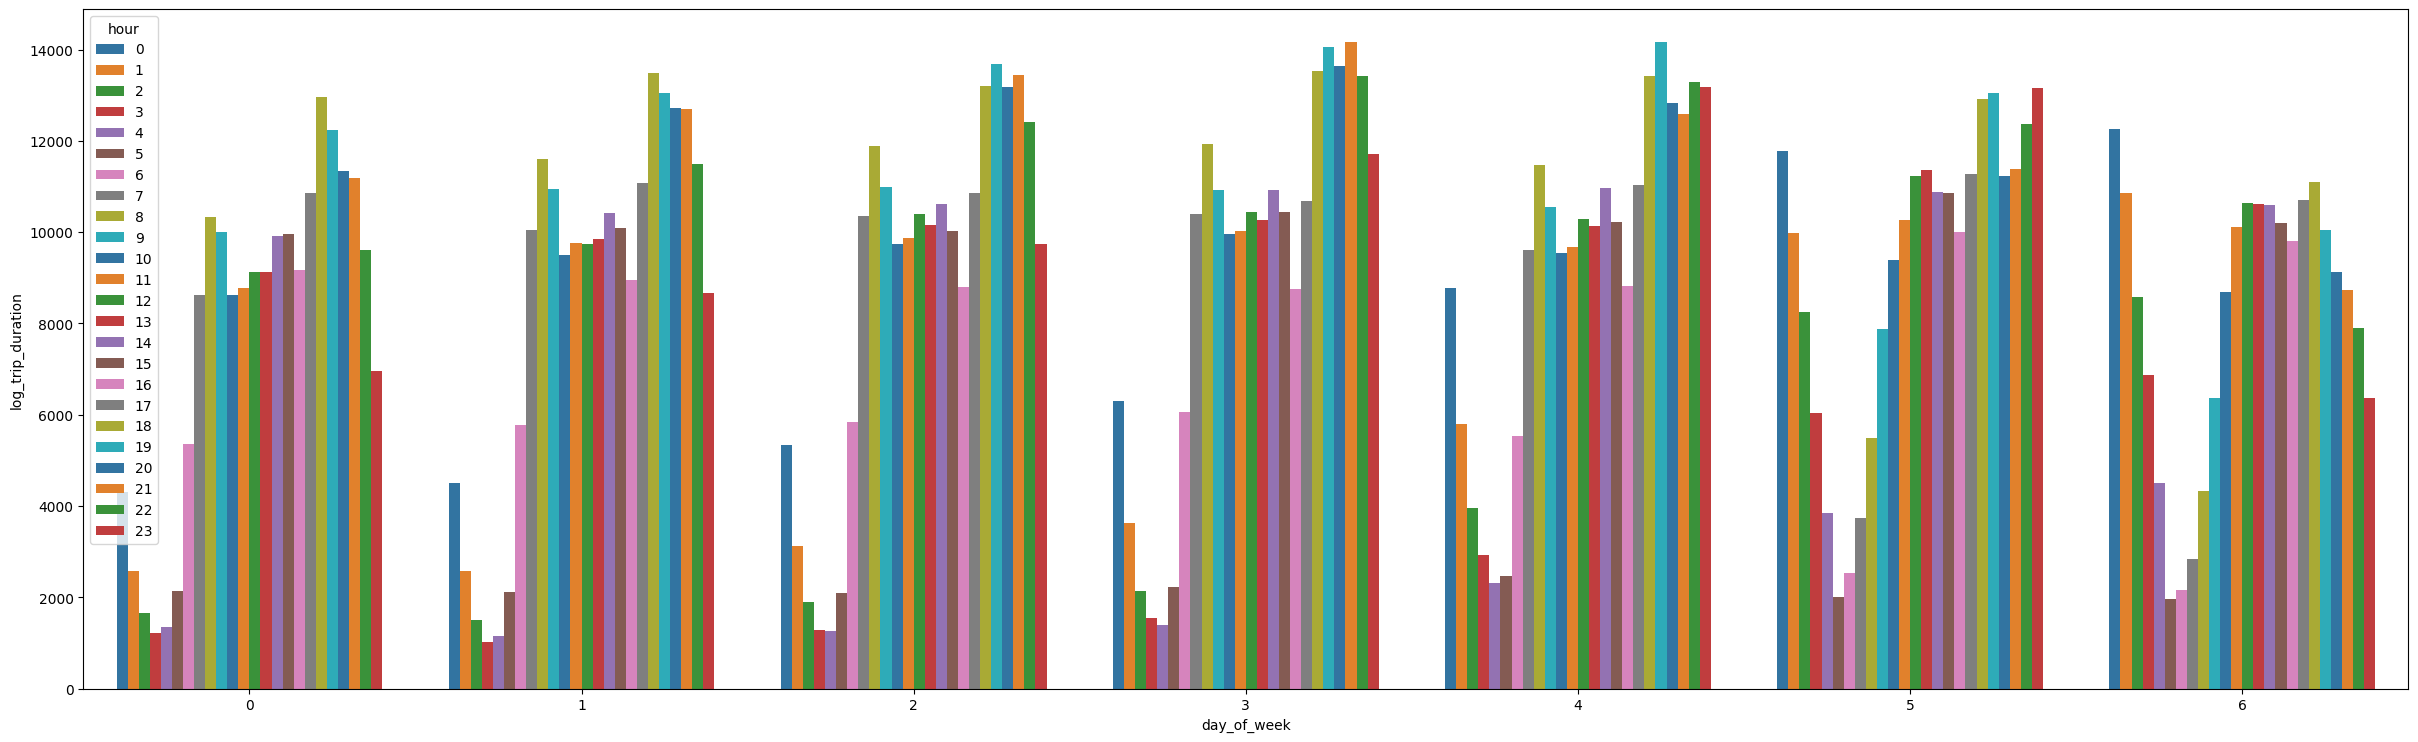

In [354]:
fig = plt.figure()
fig.set_size_inches(30, 30)

ax = fig.add_subplot(3, 1, 1)

sns.barplot(data=processed_data.groupby(['hour', 'day_of_week'],
                                        observed=True)[
    'log_trip_duration'].count().reset_index(drop=False),
            y='log_trip_duration',
            x='day_of_week',
            hue='hour',
            palette='tab10')

In [355]:
processed_data.groupby(['hour'], as_index=True).agg(
    amount_trips=pd.NamedAgg(column='log_trip_duration', aggfunc='count'),
    mean_trip_len=pd.NamedAgg(column='log_trip_duration', aggfunc='mean')).corr()

,amount_trips,mean_trip_len
amount_trips,1.00000,0.76506
mean_trip_len,0.76506,1.00000


<Axes: xlabel='day_of_week', ylabel='log_trip_duration'>

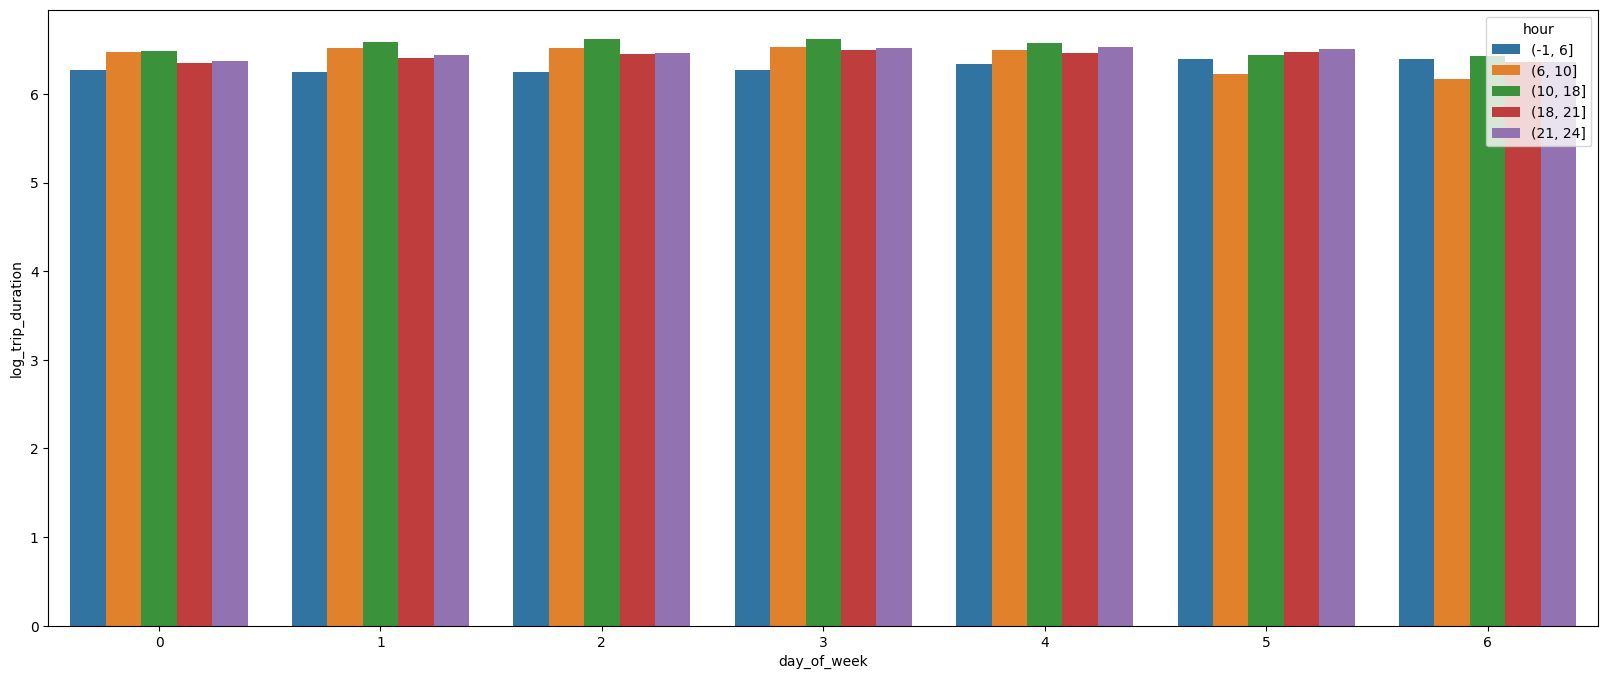

In [356]:
fig = plt.figure()
fig.set_size_inches(20, 8)

sns.barplot(data=processed_data.groupby(['day_of_week', pd.cut(processed_data.hour, [-1, 6, 10, 18, 21, 24])],
                                        observed=True)[
    'log_trip_duration'].mean().reset_index(drop=False),
            y='log_trip_duration',
            x='day_of_week',
            hue='hour',
            palette='tab10')

<Axes: xlabel='day_of_week', ylabel='log_trip_duration'>

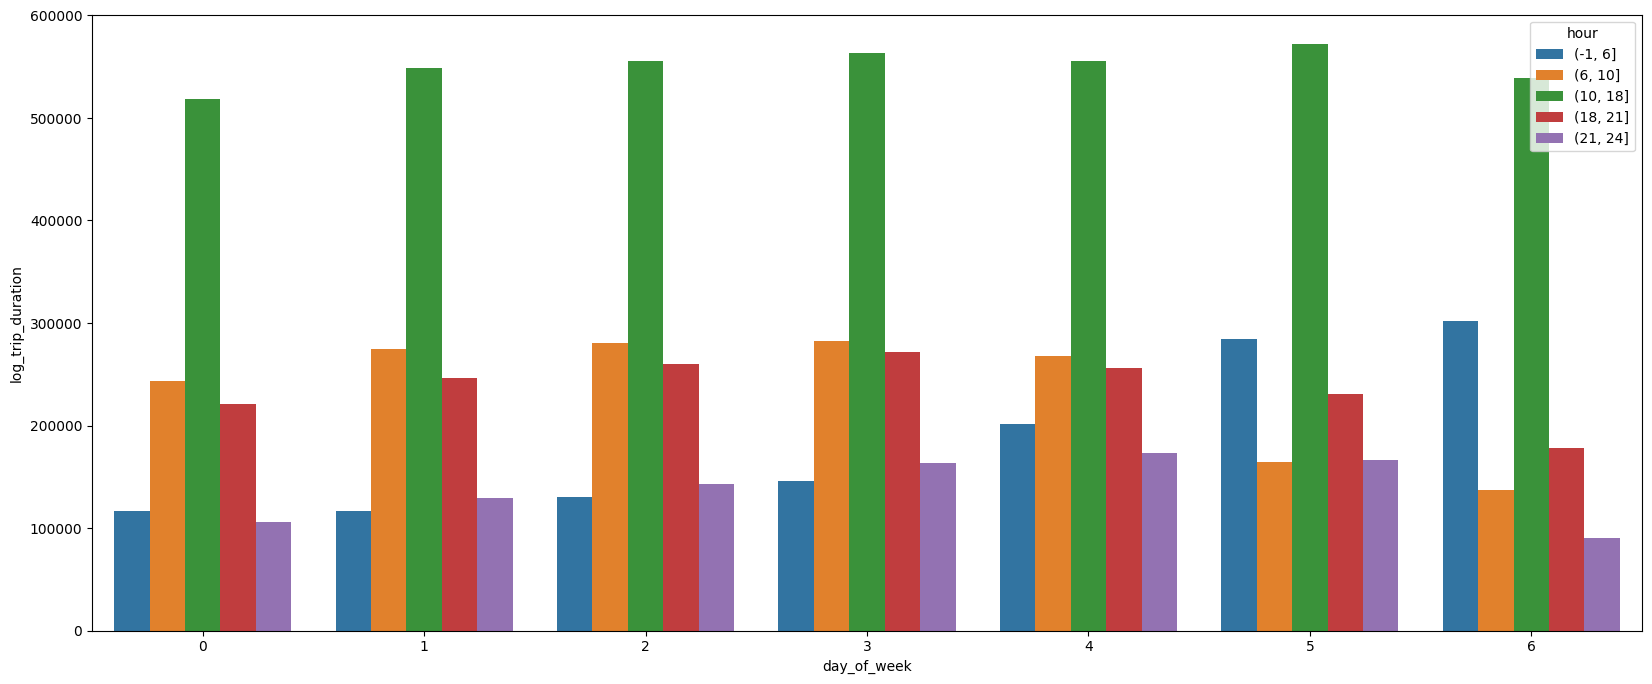

In [357]:
fig = plt.figure()
fig.set_size_inches(20, 8)

sns.barplot(data=processed_data.groupby(['day_of_week', pd.cut(processed_data.hour, [-1, 6, 10, 18, 21, 24])],
                                        observed=True)[
    'log_trip_duration'].sum().reset_index(drop=False),
            y='log_trip_duration',
            x='day_of_week',
            hue='hour',
            palette='tab10')

<Axes: xlabel='day_of_week', ylabel='log_trip_duration'>

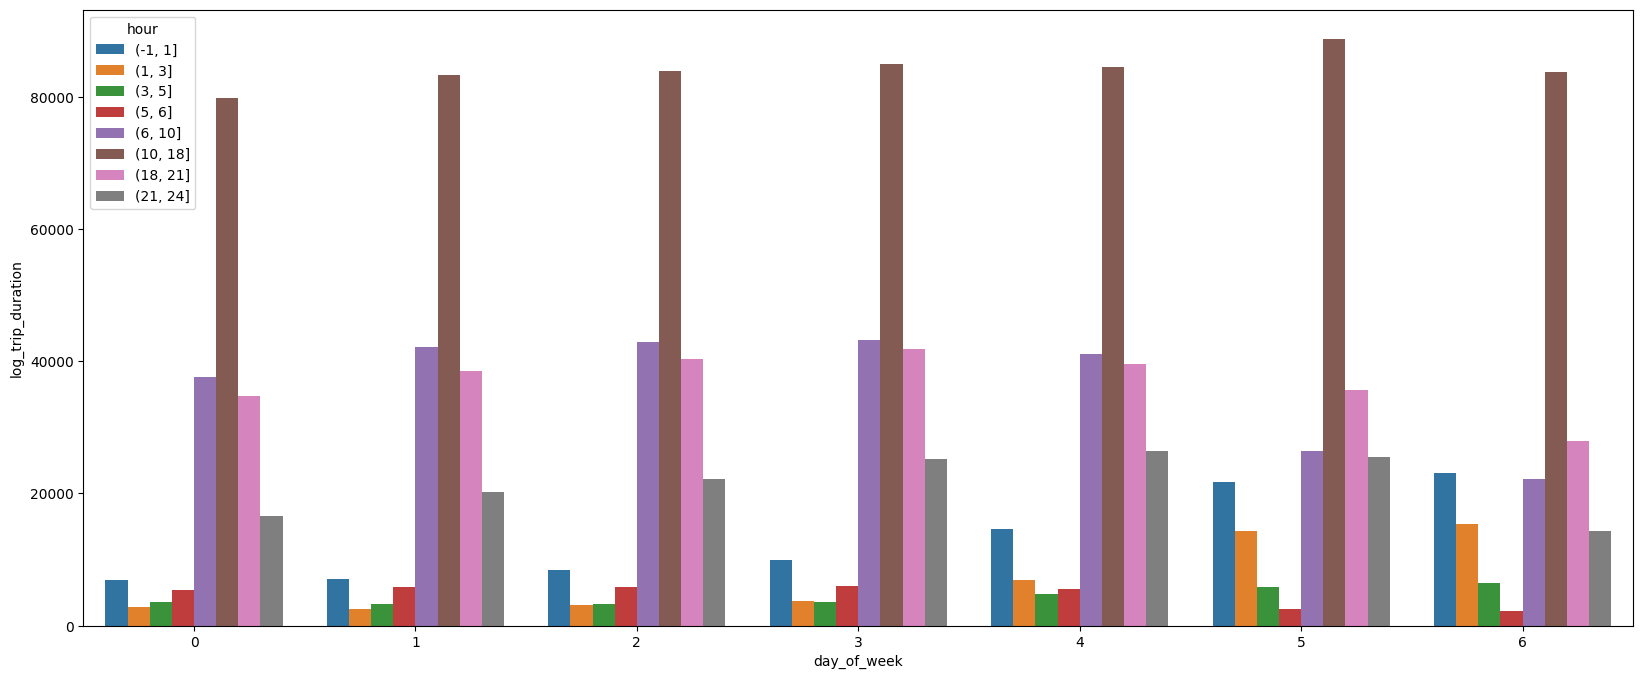

In [358]:
fig = plt.figure()
fig.set_size_inches(20, 8)

sns.barplot(data=processed_data.groupby(['day_of_week', pd.cut(processed_data.hour, [-1, 1, 3, 5, 6, 10, 18, 21, 24])],
                                        observed=True)[
    'log_trip_duration'].count().reset_index(drop=False),
            y='log_trip_duration',
            x='day_of_week',
            hue='hour')

<Axes: xlabel='day_of_week', ylabel='trip_count'>

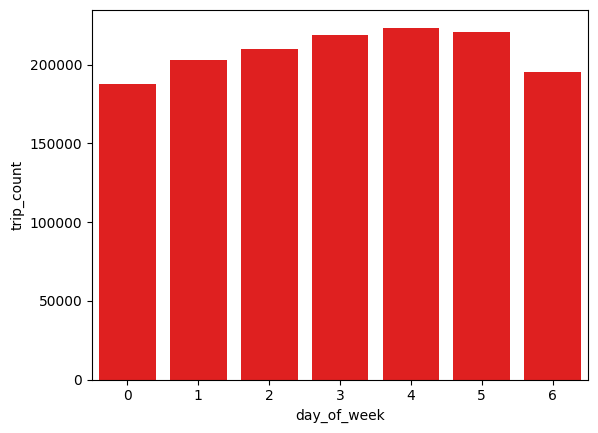

In [359]:
fig = plt.figure()

sns.barplot(
    data=processed_data.groupby('day_of_week').agg(
        trip_count=pd.NamedAgg('log_trip_duration', aggfunc='count')),
    y='trip_count',
    x='day_of_week',
    color='red')

<Axes: xlabel='month', ylabel='mean_log_dur'>

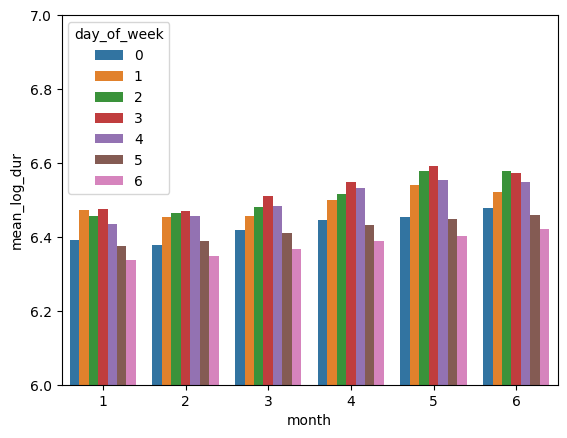

In [360]:
plt.ylim(6, 7)
sns.barplot(
    data=processed_data.groupby(['month', 'day_of_week']).agg(
        mean_log_dur=pd.NamedAgg('log_trip_duration', aggfunc='mean')),
    y='mean_log_dur',
    x='month',
    hue='day_of_week',
    palette='tab10')

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [361]:
data_save = processed_data

In [362]:
### Создадим первый бинарный признак
### Your code is here

anomaly_id = processed_data.groupby('date').agg(trips_count=pd.NamedAgg('log_trip_duration', aggfunc='count')).idxmin()

anomaly_check = processed_data.apply(
    func=lambda x: x.date == anomaly_id, axis=1)

processed_data['anomaly'] = anomaly_check.values.astype(int)

In [363]:
bad_days = processed_data.groupby(['day_of_week', 'hour']).agg(
    target_mean=pd.NamedAgg('log_trip_duration', aggfunc='mean')).nlargest(n=10, columns='target_mean').reset_index()[
    ['day_of_week', 'hour']]

traffic_check = processed_data.apply(
    func=lambda x: x.day_of_week in bad_days.day_of_week.values and x.hour in bad_days.hour.values, axis=1)

processed_data['traffic_jam'] = traffic_check.values.astype(int)

In [364]:
processed_data.drop(columns=['pickup_datetime', 'date'], inplace=True)

In [365]:
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,5,13,3,0,0
...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,4,13,4,0,1
id1049543,0,930.399753,0,6.056935,6.486161,6,7,1,0,0
id2304944,1,930.399753,0,7.832952,6.639876,4,6,4,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [368]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(drop='first')

codes = oh_encoder.fit_transform(processed_data[['day_of_week', 'hour', 'month']]).toarray()
feature_names = oh_encoder.get_feature_names_out(['day_of_week', 'hour', 'month'])

In [369]:
processed_data = pd.concat([processed_data.drop(columns=['day_of_week', 'hour', 'month']).reset_index(),
                            pd.DataFrame(codes, columns=feature_names, dtype=int)], axis=1).set_index('id')

In [371]:
processed_data.head(5).to_csv('Data/task4.csv', index=True, sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

<Axes: >

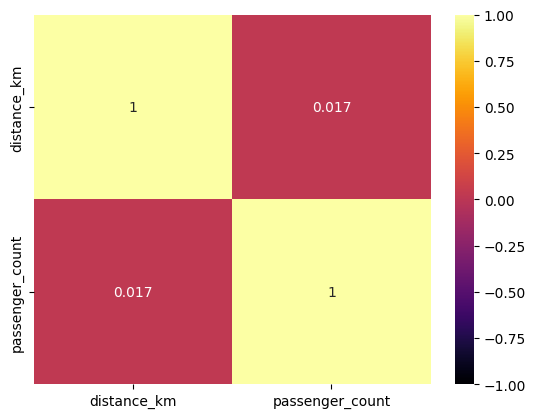

In [378]:
### Your code is here
sns.heatmap(data=processed_data[['distance_km', 'passenger_count']].corr(), annot=True, cmap='inferno', vmin=-1, vmax=1)

In [379]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [380]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X=processed_data.drop(columns=['log_trip_duration']), y=processed_data.log_trip_duration)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [382]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [388]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
import numpy as np

model = LinearRegression()

model.fit(processed_data[['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']],
          processed_data.log_trip_duration)

prediction = model.predict(processed_data[['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']])

np.mean((prediction - processed_data.log_trip_duration) ** 2).round(3)

0.414